In [18]:
# DL Lab 1
# 7 Nov 2022
# Problem Description: Using Keras build a Neural Network model and train it using MNIST dataset for doing Handwritten Digit Recognition.
# Finally evaluate the performnance of the model on Test Dataset provided in MNIST

# Step 1 - Setting up Keras and Numpy
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [19]:
# Step 2 - Loading of MNIST dataset
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [20]:
# Step 3 - Have a look at the data
train_images.shape

(60000, 28, 28)

In [21]:
print(train_labels)

[5 0 4 ... 5 6 8]


In [22]:
print(train_images.dtype)

uint8


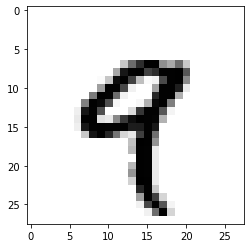

In [23]:
# Plot a sample image from the training dataset
i = 4
digit = train_images[i]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [24]:
print(train_labels[i])

9


In [25]:
# Step 4 - Building the layered Neural Network Model for Handwritten Digit Recognition
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [26]:
# Step 5- Compiling the Neural Network Model
# by providing optimizer, loss function and accuracy metric

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Step 6 - Input Data Preparation or Pre-Processing
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [28]:
print(train_labels[0])

5


In [29]:
# Preparing the labels (using One Hot Encoding)
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


# Step7: We are now ready to train the network.
Training is done in Keras via calling *fit* method on the network model

In [30]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2546 - accuracy: 0.9262
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1031 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0679 - accuracy: 0.9803
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0488 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0371 - accuracy: 0.9887


# Evaluating the Performance of our Trained NN Model on Test Data

In [31]:
test_loss,test_acc = network.evaluate(test_images, test_labels)
print('test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9777
test accuracy:  0.9776999950408936


# Final Step -Using the Trained and Tested Model to do actual work of Prediction

In [32]:
network.predict(test_images[0:1])

1/1 [==============================] - 0s 63ms/step


array([[1.7616375e-09, 1.5854473e-09, 2.4420547e-06, 1.1683097e-04,
        9.6404378e-12, 1.6680681e-07, 7.8548177e-15, 9.9987841e-01,
        1.1929014e-07, 2.0546811e-06]], dtype=float32)

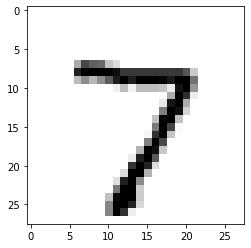

In [33]:
i = 5
test_images_copy = test_images.reshape((10000,28,28))
digit = test_images_copy[0]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()